<a href="https://colab.research.google.com/github/TanayKashyap/K-Means-Clustering-With-Spotify/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload csv
from google.colab import files
raw_data = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [3]:
# convert to df
spotify_songs = pd.read_csv('spotify_songs.csv')

In [4]:
spotify_songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [5]:
spotify_songs = spotify_songs.sample(n=2000,random_state=2025)



1.   What makes two songs sound similar?
2.   Imagine you're organizing a massive Spotify playlist. You want to group songs that feel similar together—what characteristics would help?
3. 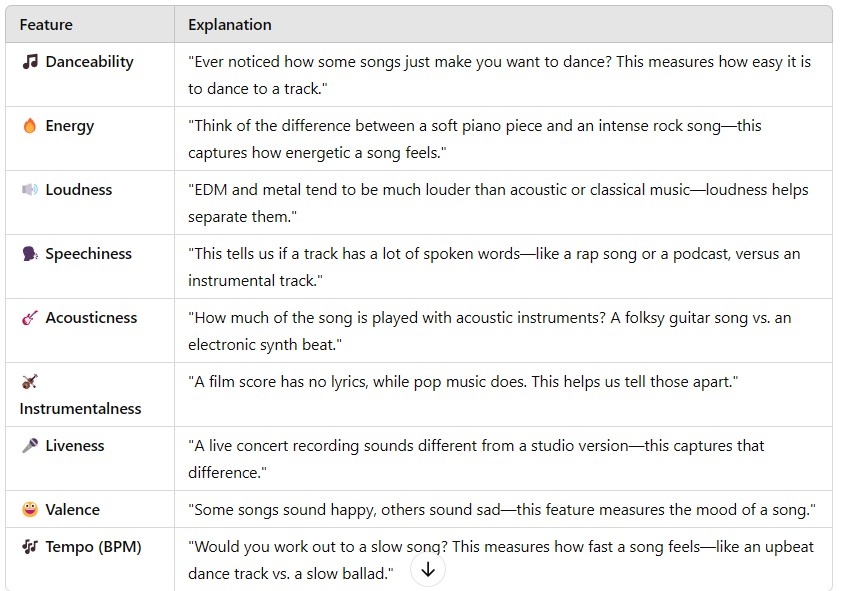
4. Why didn’t we use artist name, genre, or playlist?
* Categorical Data: "K-means clustering works best with numbers, not text labels like artist names or playlist genres."

* Too Broad: "Genres are useful, but songs within the same genre can still be very different (e.g., a slow pop ballad vs. a dance-pop hit)."

* Unique Identifiers: "IDs (like track_id) are just random numbers; they don’t tell us anything about the music."





In [6]:
# Selecting numerical features for clustering
# These features represent key musical attributes that influence song grouping
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

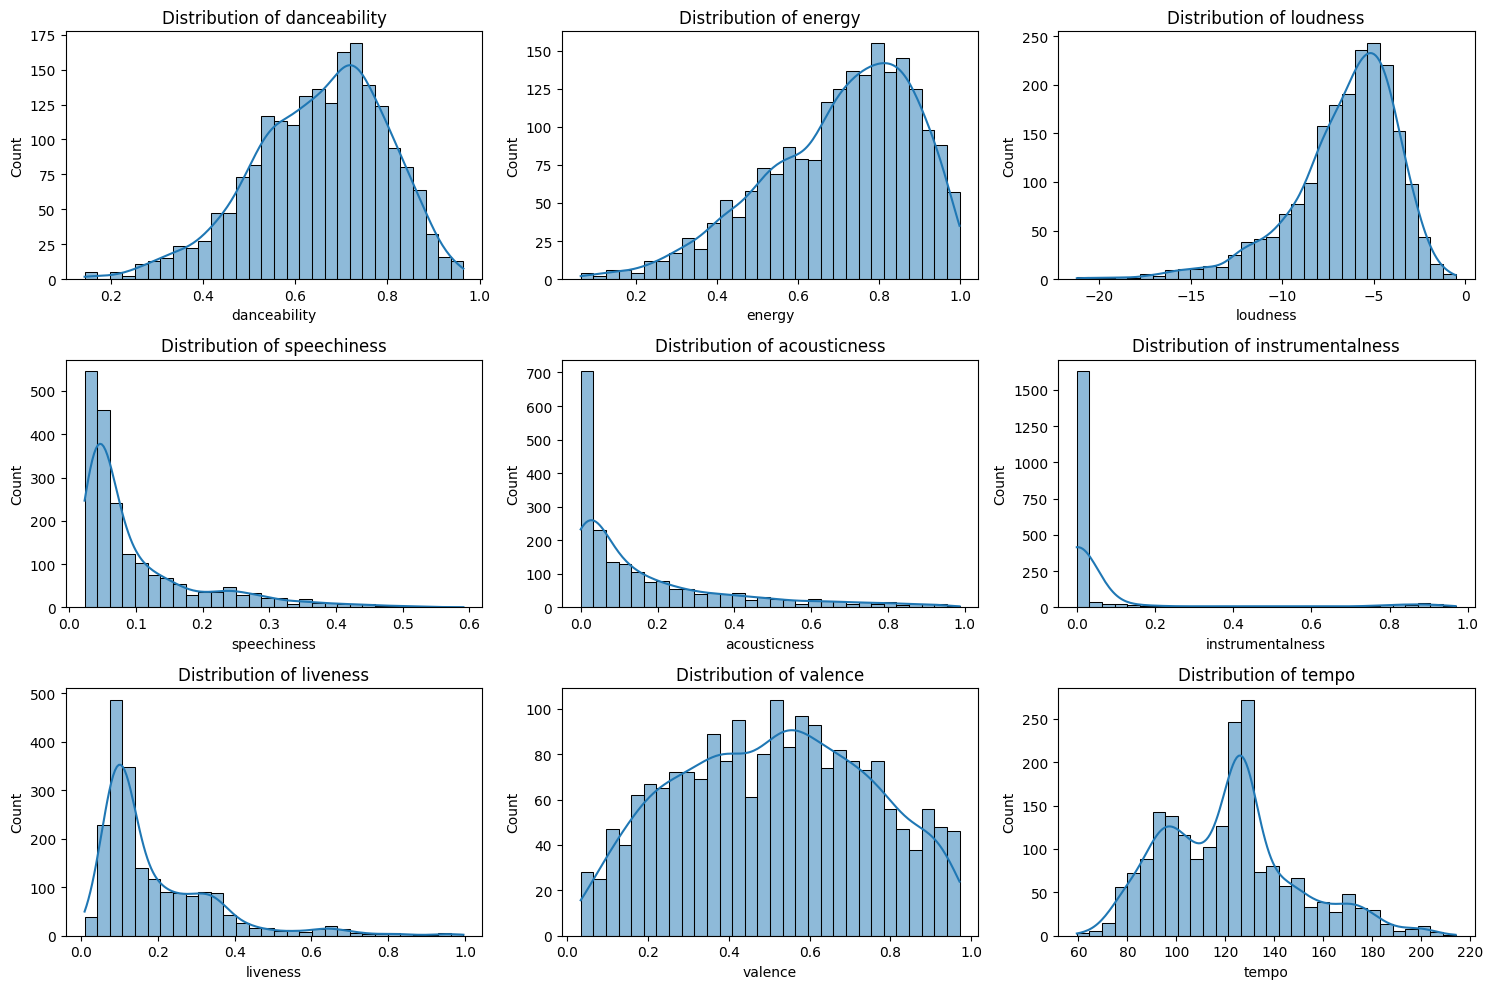

In [7]:
# Visualizing feature distributions before normalization
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(spotify_songs[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

As you can see, the different features have different distributions and so values like tempo can dominate the clustering because of skewed values, thats why it is important to normalize all the features before K-means.

In [8]:
# Drop missing values
spotify_songs = spotify_songs.dropna(subset=features)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
spotify_songs_scaled = scaler.fit_transform(spotify_songs[features])

In [10]:
# Convert scaled data back to DataFrame
spotify_songs_scaled = pd.DataFrame(spotify_songs_scaled, columns=features)
spotify_songs_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.524331,0.918595,0.875707,0.042973,0.425962,0.000195,0.138490,0.212238,0.314497
1,0.772506,0.823265,0.726275,0.446988,0.209937,0.000000,0.112138,0.752692,0.141098
2,0.923358,0.630463,0.763500,0.459317,0.192696,0.001014,0.081225,0.884874,0.224360
3,0.787105,0.751500,0.587285,0.212751,0.020585,0.000011,0.052339,0.805991,0.329399
4,0.227494,0.967866,0.842301,0.255019,0.006691,0.000005,0.358429,0.132289,0.476589
...,...,...,...,...,...,...,...,...,...
1995,0.574209,0.530848,0.652502,0.027651,0.448274,0.000004,0.124301,0.500053,0.468783
1996,0.469586,0.990360,0.808219,0.033110,0.001275,0.001527,0.047981,0.678073,0.536250
1997,0.508516,0.932519,0.841721,0.123987,0.011153,0.000000,0.254034,0.631169,0.197867
1998,0.732360,0.972151,0.856273,0.095456,0.009155,0.479876,0.291535,0.557616,0.444023


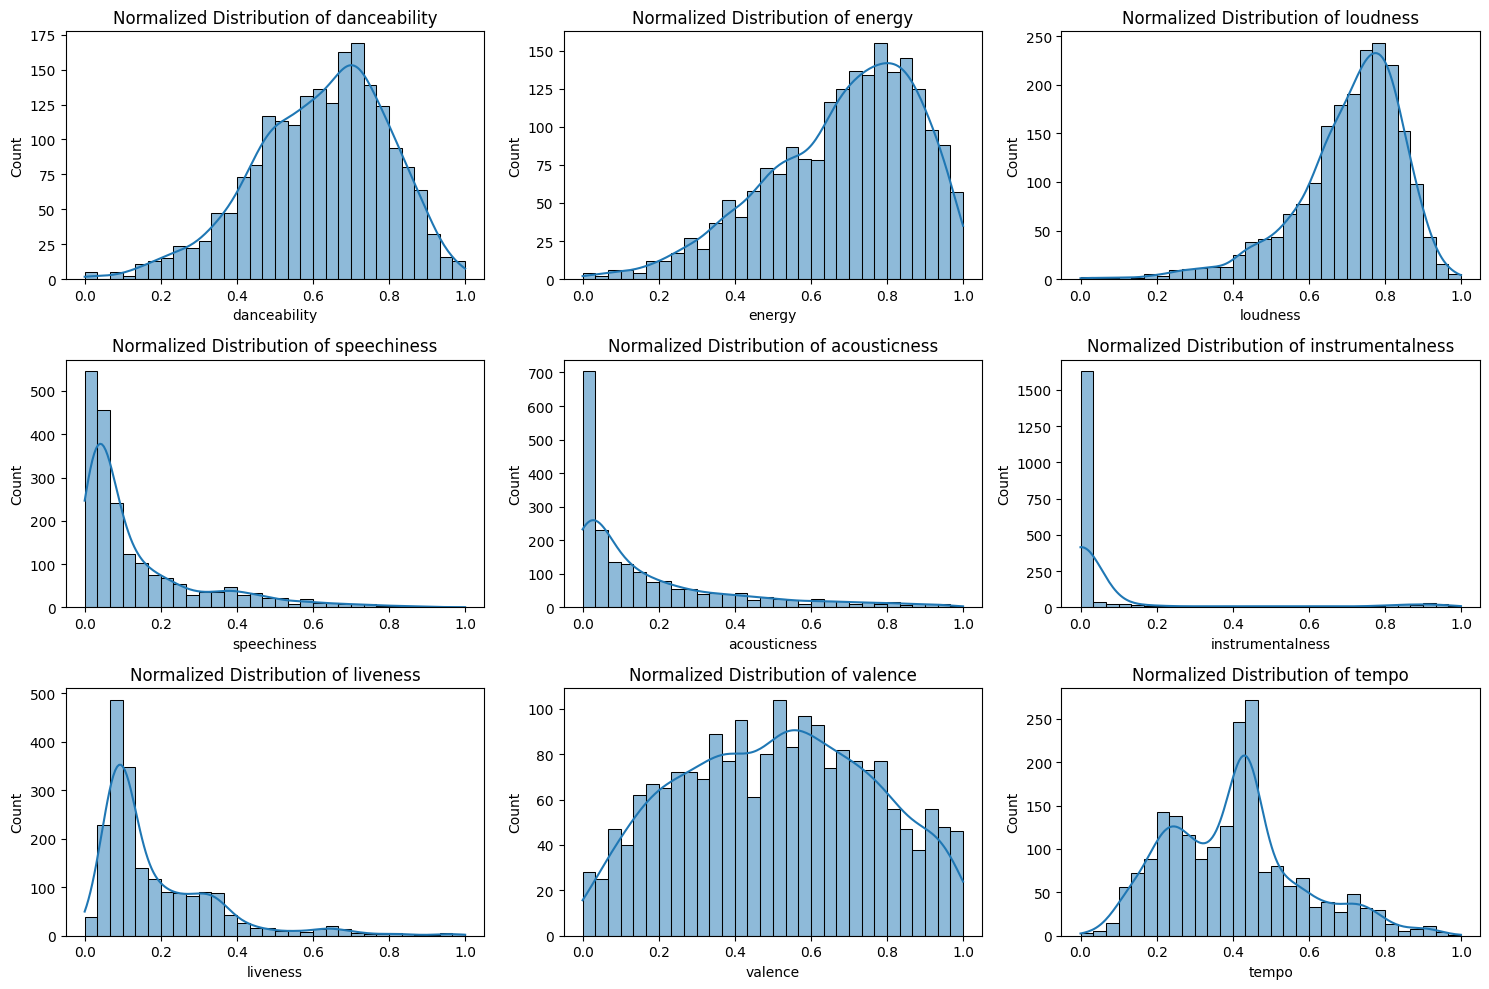

In [11]:
# Visualizing feature distributions after normalization
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(spotify_songs_scaled[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Normalized Distribution of {feature}')
plt.tight_layout()
plt.show()

Since K-means clustering is based on euclidean distance, features with larger values will have more influence.
For example, If in a race, if one runner measures in metres and one measures in kilometers, it wouldn't be a really good comparison to make until they are both in the same unit of measurement.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# dummy target
dummy_y = np.ones(spotify_songs_scaled.shape[0])
# Apply RFE with a classifier instead of regressor
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=6)
X_selected = selector.fit_transform(spotify_songs_scaled, dummy_y)

# Cons of using all features
1. **Curse of Dimensionality:** As the number of features increases, the distance between points in high-dimensional space becomes less meaningful. This can make the clusters less interpretable because the distances can become very large and sparse.
2. **Computational Complexity**
3. **Noise:** Some features might be irrelevant or noisy, and including them could negatively affect the quality of clustering.

# Cons of using subset of features
1. **Information Loss:** You may lose important relationships and nuances present in the excluded features, which could impact the clustering accuracy.

2. **Risk of Missing Key Features:** If you select the wrong features, you might miss patterns that would have emerged if all features were considered.

In [13]:
selected_features = np.array(features)[selector.support_]
print("Selected Features:", selected_features)

Selected Features: ['speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo']


In [14]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_selected

,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.042973,0.425962,0.000195,0.138490,0.212238,0.314497
1,0.446988,0.209937,0.000000,0.112138,0.752692,0.141098
2,0.459317,0.192696,0.001014,0.081225,0.884874,0.224360
3,0.212751,0.020585,0.000011,0.052339,0.805991,0.329399
4,0.255019,0.006691,0.000005,0.358429,0.132289,0.476589
...,...,...,...,...,...,...
1995,0.027651,0.448274,0.000004,0.124301,0.500053,0.468783
1996,0.033110,0.001275,0.001527,0.047981,0.678073,0.536250
1997,0.123987,0.011153,0.000000,0.254034,0.631169,0.197867
1998,0.095456,0.009155,0.479876,0.291535,0.557616,0.444023


In [15]:
# Find Optimal Number of Clusters using Elbow Method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
inertia = []
distortions = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_selected, kmeans.cluster_centers_, 'euclidean'), axis=1)**2)/X_selected.shape[0])

1. Interia
*   Lower interia the better, because it means the points are closer to their centroids
*   Remember, as you increase k, interia will always decrease because you will be placing more centroids and thus be reducing the distance between points and centroids
2. Distortion normalizes interia by dividing by the number of data points which helps mitigate the impact the curse of dimensionality.

Since we are normalizing the data before clustering, the risk of interia exploding will be mitigated, plus its the default for k-means.



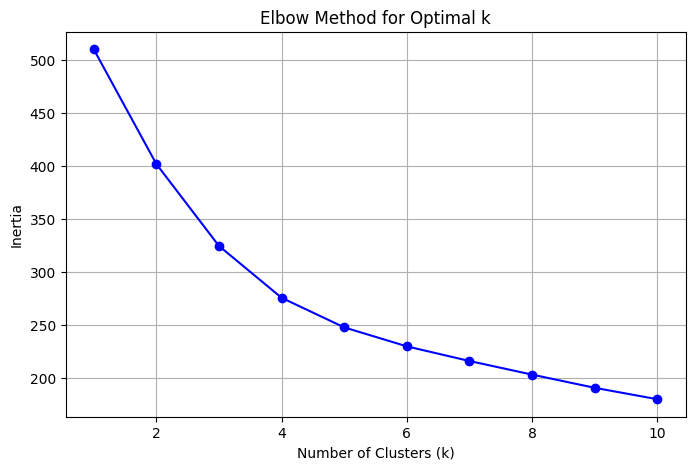

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

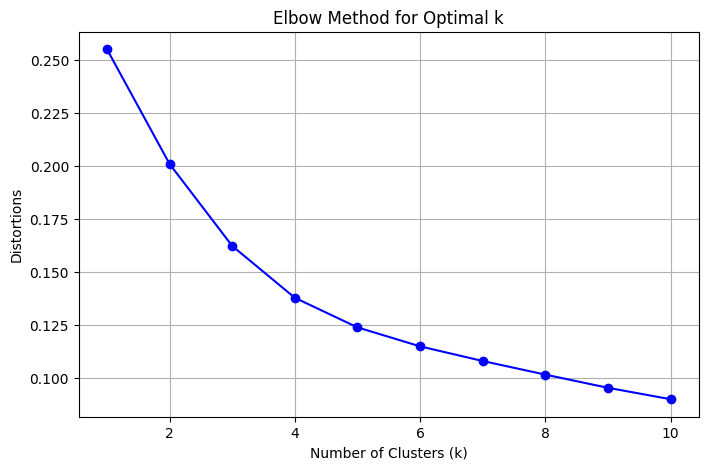

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortions")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

In [20]:
from kneed import KneeLocator
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = int(kl.elbow)

In [21]:
# Fit K-Means with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_selected)

n_init is Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems

In [22]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_selected, final_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23925481337671772


In [23]:
# Calculate Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(X_selected, final_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_score_value}")

Davies-Bouldin Index: 1.3118460568404782


**Silhouette Score:** Measures how similar points in a cluster are to their own cluster vs. other clusters. Higher values indicate better-defined clusters.

**Davies-Bouldin Index:** Measures the ratio of intra-cluster distances to inter-cluster distances. Lower values indicate better clustering.

Interpreting These Scores:\
**Silhouette Score** (0.23) → Weak Clustering
A good silhouette score is typically above 0.5.
A score below 0.25 suggests overlapping clusters or poor separation.

Your clusters might not be well-separated, or the dataset might not be naturally clusterable with K-Means.

**Davies-Bouldin Index** (1.31) → Moderate Quality
Lower values (closer to 0) indicate well-separated and compact clusters.
A value close to 1 suggests some overlap between clusters but not terrible.

What Could Be Happening?
- Clusters may not be well-defined
- Spotify music features might not form distinct groups, making K-Means less effective.
- Some features could be highly correlated, affecting separation.
- Feature selection might need tuning
- RFE picked 6 features, but were they the best for clustering?
- Maybe using PCA or another dimensionality reduction technique could help.

K-Means might not be the best choice

Since K-Means assumes spherical clusters, other clustering algorithms like DBSCAN or Hierarchical Clustering might work better.

Text(0.5, 1.0, 'PCA Loadings')

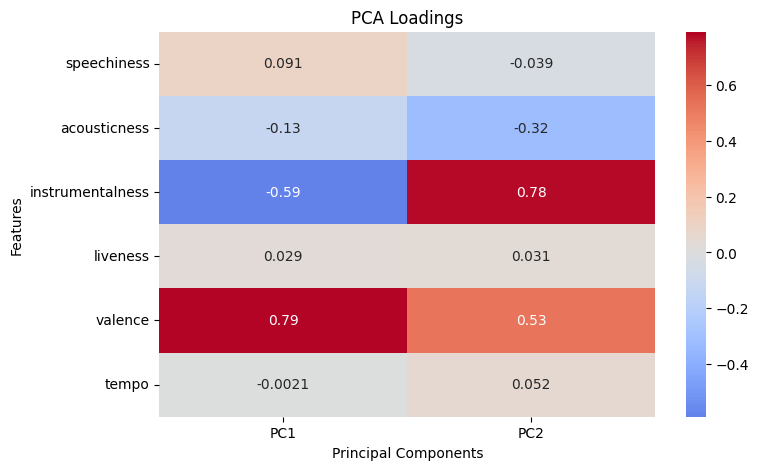

In [24]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_selected)

# PCA Feature Weightings (How much each feature contributes to PCA)
loadings = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=X_selected.columns)
plt.figure(figsize=(8,5))
sns.heatmap(loadings, annot=True, cmap='coolwarm',center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title('PCA Loadings')

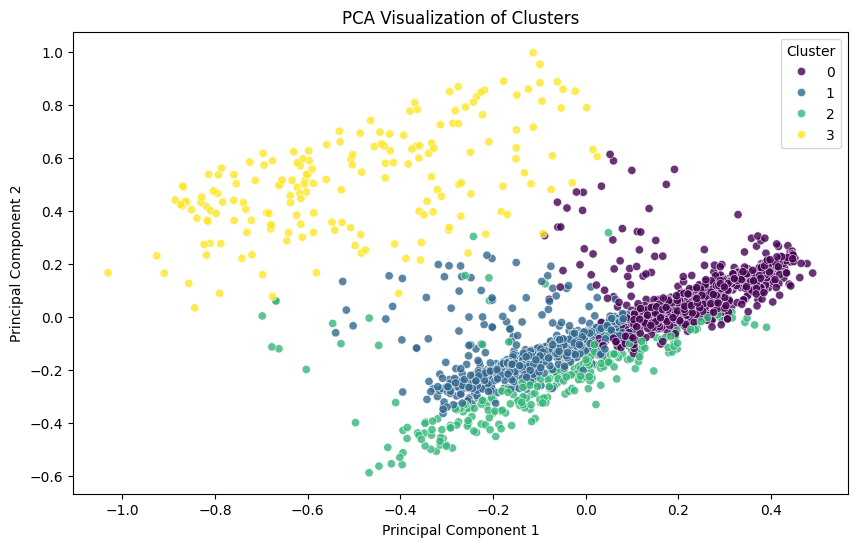

In [25]:
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = final_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette='viridis',alpha=0.8)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Text(0.5, 1.0, 'PCA Loadings')

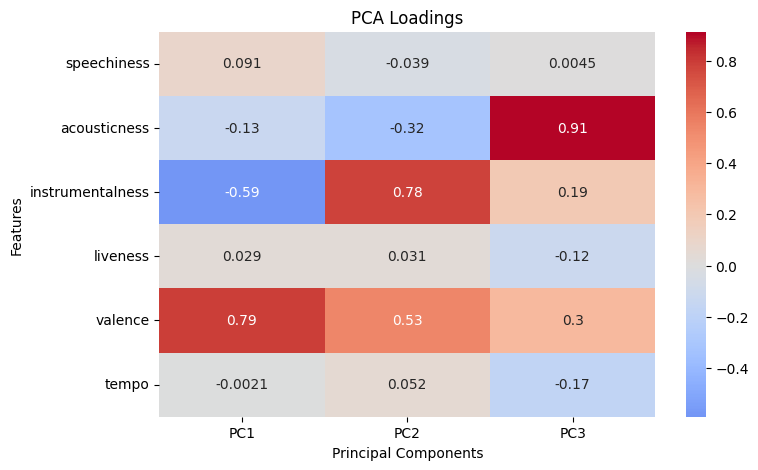

In [26]:
import plotly.express as px

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_selected)

# PCA Feature Weightings (How much each feature contributes to PCA)
loadings_3d = pd.DataFrame(pca_3d.components_.T, columns=['PC1', 'PC2','PC3'], index=X_selected.columns)
plt.figure(figsize=(8,5))
sns.heatmap(loadings_3d, annot=True, cmap='coolwarm',center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title('PCA Loadings')

In [27]:
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2','PC3'])
df_pca_3d['Cluster'] = final_labels

fig = px.scatter_3d(df_pca_3d,x='PC1',y='PC2',z='PC3',color=df_pca_3d['Cluster'].astype(str),title='PCA Visualization of Clusters',
                    color_discrete_sequence=px.colors.qualitative.Vivid,
                    opacity=0.8)
fig.show()

In [28]:
X_selected['Cluster'] = final_labels
cluster_summary = X_selected.groupby('Cluster')[X_selected.columns].mean()
cluster_summary

,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
Cluster,,,,,,,
0,0.155465,0.128608,0.018583,0.184232,0.731195,0.396821,0.0
1,0.133498,0.080003,0.021984,0.200461,0.314119,0.411845,1.0
2,0.121080,0.614083,0.035868,0.155233,0.420967,0.383500,2.0
3,0.111949,0.164530,0.804206,0.185671,0.414828,0.401824,3.0


1. **Where else can clustering be applied?**
*   Netflix Shows
*   NBA Players
2. **What are the limitations of K-Means**
- Requires Predefined K – You must choose the number of clusters beforehand, which isn’t always obvious.
- Sensitive to Initialization – Poor centroid initialization can lead to suboptimal clusters.
- Assumes Spherical Clusters – Works best with circular clusters; struggles with non-spherical or elongated shapes.
- Sensitive to Outliers – A few outliers can distort cluster centers significantly.
- Fails on Varying Densities – Doesn't handle clusters of different densities well.
- Struggles with High Dimensions – Distance-based metrics become less meaningful in high-dimensional space.
3. **DBSCAN vs Hierarchial Clustering**
*   DBSCAN: Groups points based on density. Good for Anomaly detection, non-spherical clusters, and noisy data.
*   Hierarchial: Creates a tree-like hierarchy of clusters. Good for Small datasets, hierarchical relationships (e.g., taxonomy of species).
4. **Next Steps**
*   Use a better method for feature selection (Correlation Analysis)
*   Upgrade your project by using the Spotify API
* Use cluster labels to suggest new songs to users








